<a href="https://colab.research.google.com/github/piyushyadav112233/DBSCAN-/blob/main/Flipkart_Sale_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [170]:
df=pd.read_csv('/content/23_09_2022.csv')
df

,name,offer_price,original_price,off_now,total_ratings,total_reviews,rating,description,created_at
0,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,64890,102090,36% off,15,3,4.3,"['AMD Ryzen 7 Octa Core Processor', '8 GB DDR4...",2022-09-23 22:43:19.013209+05:30
1,Infinix X1 Series Core i7 10th Gen - (16 GB/51...,46890,69999,33% off,115,17,4.3,"['Intel Core i7 Processor (10th Gen)', '16 GB ...",2022-09-23 22:43:19.013209+05:30
2,ASUS VivoBook K15 OLED Ryzen 7 Octa Core AMD R...,56890,86990,34% off,441,70,4.3,"['AMD Ryzen 7 Octa Core Processor', '16 GB DDR...",2022-09-23 22:43:19.014208+05:30
3,ASUS Vivobook 15 Ryzen 3 Dual Core AMD R3-3250...,26890,49990,46% off,0,0,0.0,"['AMD Ryzen 3 Dual Core Processor', '8 GB DDR4...",2022-09-23 22:43:19.014208+05:30
4,HP Core i5 12th Gen - (16 GB/512 GB SSD/Window...,57890,72331,19% off,136,18,4.3,"['Intel Core i5 Processor (12th Gen)', '16 GB ...",2022-09-23 22:43:19.014208+05:30
...,...,...,...,...,...,...,...,...,...
931,Infinix X1 Slim Series Core i5 10th Gen - (16 ...,39890,64999,38% off,57,17,4.0,"['Intel Core i5 Processor (10th Gen)', '16 GB ...",2022-09-23 22:43:51.942895+05:30
932,HP Core i3 11th Gen - (8 GB/256 GB SSD/Windows...,46900,51000,8% off,1036,109,4.3,"['Intel Core i3 Processor (11th Gen)', '8 GB D...",2022-09-23 22:43:51.943895+05:30
933,HP Ryzen 5 Quad Core 3rd Gen - (8 GB/1 TB HDD/...,47899,60900,21% off,0,0,0.0,"['AMD Ryzen 5 Quad Core Processor (3rd Gen)', ...",2022-09-23 22:43:51.943895+05:30
934,Lenovo Core i5 11th Gen - (8 GB/512 GB SSD/Win...,56899,84190,32% off,0,0,0.0,"['Intel Core i5 Processor (11th Gen)', '8 GB D...",2022-09-23 22:43:51.943895+05:30


In [171]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(936, 9)
Index(['name', 'offer_price', 'original_price', 'off_now', 'total_ratings',
       'total_reviews', 'rating', 'description', 'created_at'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            936 non-null    object 
 1   offer_price     936 non-null    int64  
 2   original_price  936 non-null    int64  
 3   off_now         936 non-null    object 
 4   total_ratings   936 non-null    int64  
 5   total_reviews   936 non-null    int64  
 6   rating          936 non-null    float64
 7   description     936 non-null    object 
 8   created_at      936 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 65.9+ KB
None
         offer_price  original_price  total_ratings  total_reviews      rating
count     936.000000      936.000000     936.000000     936.000000  936.000000
mean

In [172]:
print(df.head)

<bound method NDFrame.head of                                                   name  offer_price  \
0    Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...        64890   
1    Infinix X1 Series Core i7 10th Gen - (16 GB/51...        46890   
2    ASUS VivoBook K15 OLED Ryzen 7 Octa Core AMD R...        56890   
3    ASUS Vivobook 15 Ryzen 3 Dual Core AMD R3-3250...        26890   
4    HP Core i5 12th Gen - (16 GB/512 GB SSD/Window...        57890   
..                                                 ...          ...   
931  Infinix X1 Slim Series Core i5 10th Gen - (16 ...        39890   
932  HP Core i3 11th Gen - (8 GB/256 GB SSD/Windows...        46900   
933  HP Ryzen 5 Quad Core 3rd Gen - (8 GB/1 TB HDD/...        47899   
934  Lenovo Core i5 11th Gen - (8 GB/512 GB SSD/Win...        56899   
935  Infinix X1 Slim Series Core i7 10th Gen - (16 ...        46890   

     original_price  off_now  total_ratings  total_reviews  rating  \
0            102090  36% off             15    

In [173]:
df.describe()

,offer_price,original_price,total_ratings,total_reviews,rating
count,936.000000,936.000000,936.000000,936.000000,936.000000
mean,70249.155983,94745.700855,295.676282,40.758547,3.119338
std,52525.573657,61527.660274,1019.319005,136.423638,1.883983
min,13990.000000,18890.000000,0.000000,0.000000,0.000000
25%,39890.000000,59999.000000,0.000000,0.000000,0.000000
50%,49890.000000,69999.000000,32.000000,4.000000,4.200000
75%,76135.000000,104890.000000,115.000000,20.000000,4.300000
max,391890.000000,481990.000000,12850.000000,1390.000000,5.000000


<Axes: xlabel='rating', ylabel='Count'>

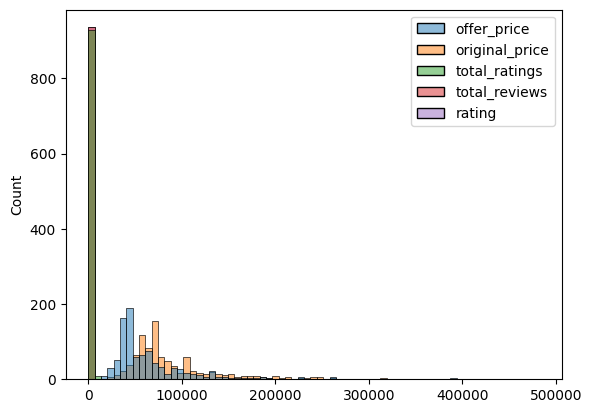

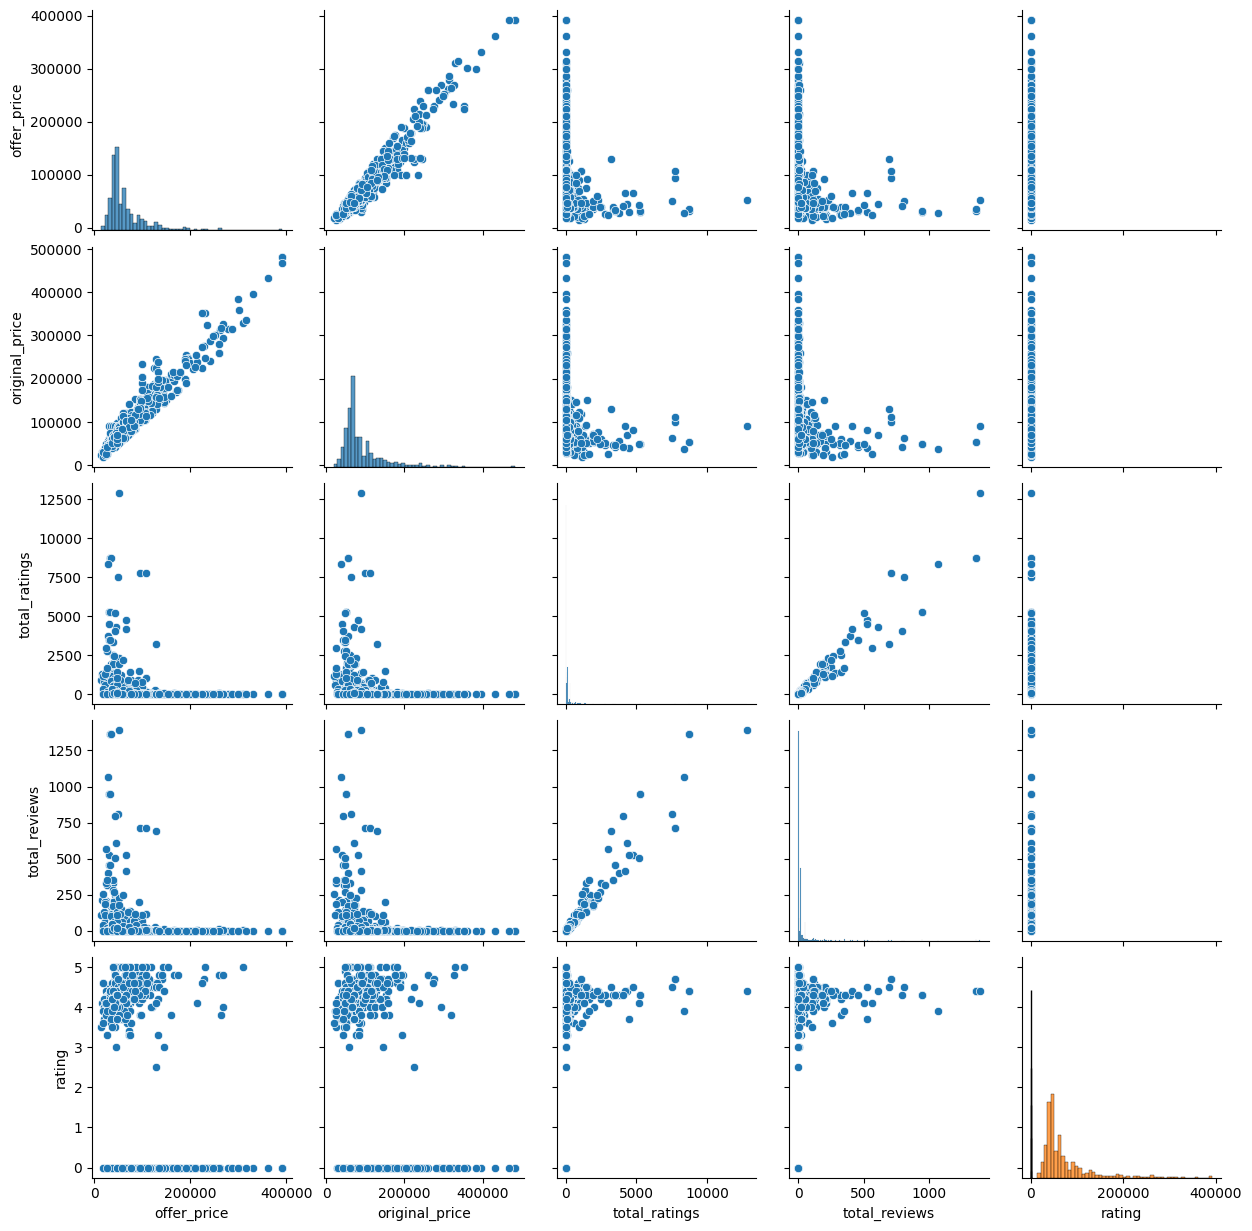

In [174]:
sns.histplot(df)
sns.pairplot(df)
sns.histplot(df['offer_price'])


<Axes: xlabel='total_reviews', ylabel='Count'>

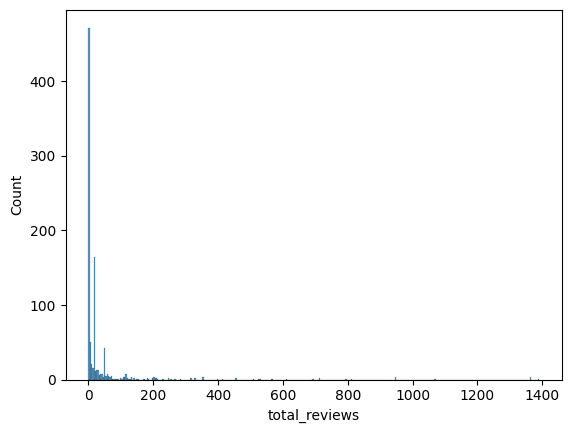

In [175]:
sns.histplot(df['total_reviews'])

<Axes: xlabel='total_ratings', ylabel='Count'>

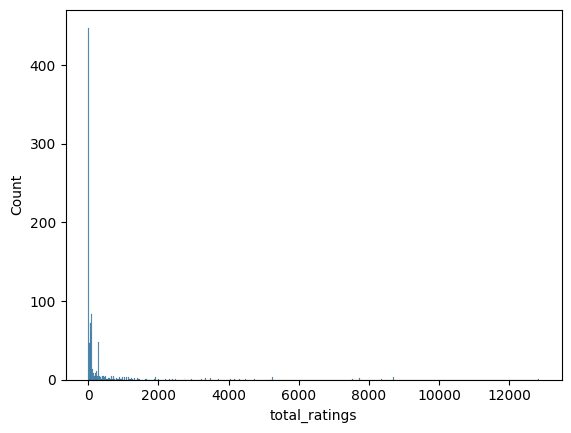

In [176]:
sns.histplot(df['total_ratings'])

<Axes: xlabel='original_price', ylabel='Count'>

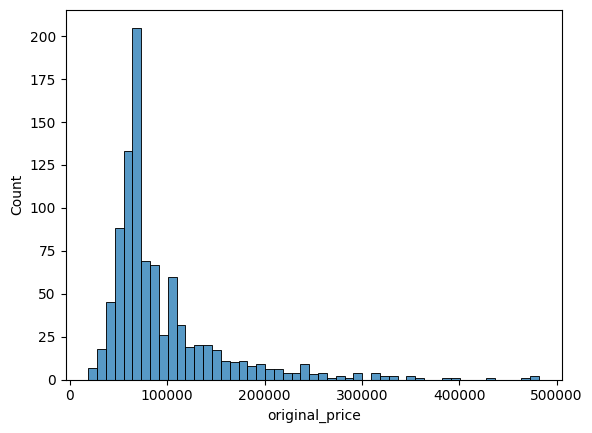

In [177]:
sns.histplot(df['original_price'])

                offer_price  original_price  total_ratings  total_reviews  \
offer_price        1.000000        0.969206      -0.130534      -0.142080   
original_price     0.969206        1.000000      -0.141534      -0.151469   
total_ratings     -0.130534       -0.141534       1.000000       0.968960   
total_reviews     -0.142080       -0.151469       0.968960       1.000000   
rating            -0.370012       -0.357211       0.181017       0.183340   

                  rating  
offer_price    -0.370012  
original_price -0.357211  
total_ratings   0.181017  
total_reviews   0.183340  
rating          1.000000  


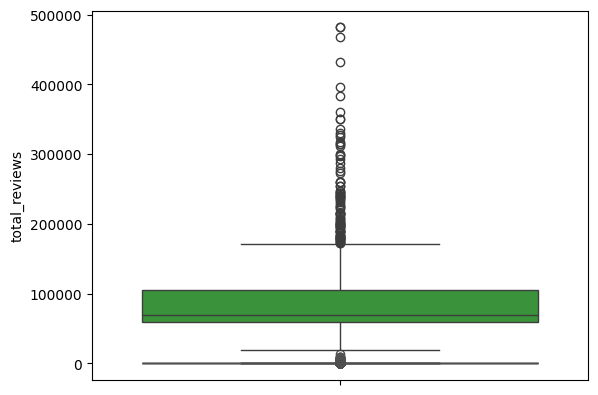

In [178]:
sns.boxplot(df['total_reviews'])
sns.boxplot(df['total_ratings'])
sns.boxplot(df['original_price'])
print(df.corr(numeric_only=True))

<Axes: xlabel='total_reviews', ylabel='total_ratings'>

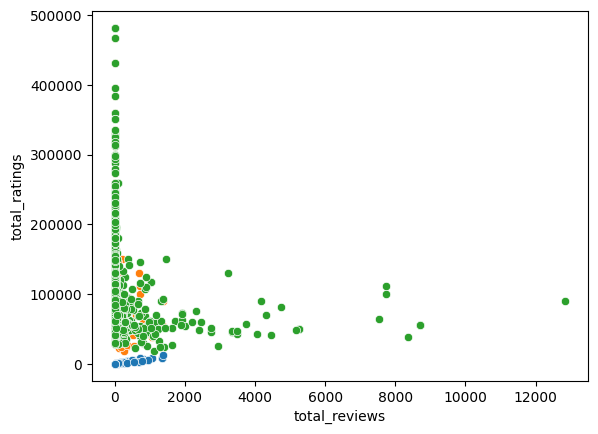

In [179]:
sns.scatterplot(x=df['total_reviews'], y=df['total_ratings'])
sns.scatterplot(x=df['total_reviews'], y=df['original_price'])
sns.scatterplot(x=df['total_ratings'], y=df['original_price'])

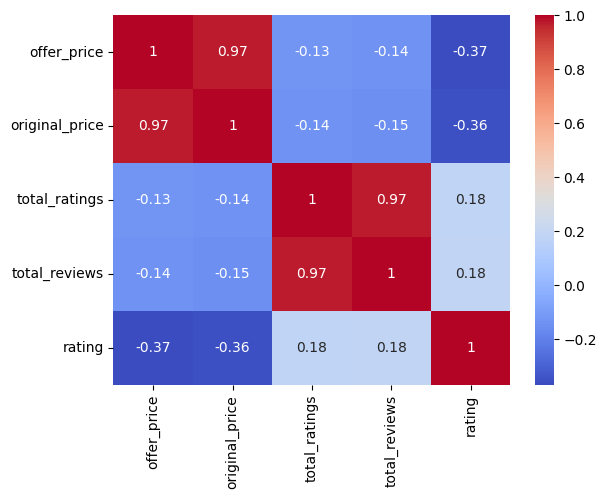

In [180]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [181]:
# 1. Price Difference:
df['price_difference'] = df['original_price'] - df['offer_price']
print(df['price_difference'])


0      37200
1      23109
2      30100
3      23100
4      14441
       ...  
931    25109
932     4100
933    13001
934    27291
935    23109
Name: price_difference, Length: 936, dtype: int64


In [182]:
df['discount_percentage'] = ((df['original_price'] - df['offer_price']) / df['original_price']) * 100
print(df['discount_percentage'])

0      36.438437
1      33.013329
2      34.601678
3      46.209242
4      19.965160
         ...    
931    38.629825
932     8.039216
933    21.348112
934    32.415964
935    33.013329
Name: discount_percentage, Length: 936, dtype: float64


In [183]:
# 4. Binning or Categorizing Numerical Features:
bins = [0, 50, 100, 150, float('inf')]
labels = ['0-50', '50-100', '100-150', '150+']
df['price_range'] = pd.cut(df['original_price'], bins=bins, labels=labels)
print(df['price_range'])


0      150+
1      150+
2      150+
3      150+
4      150+
       ... 
931    150+
932    150+
933    150+
934    150+
935    150+
Name: price_range, Length: 936, dtype: category
Categories (4, object): ['0-50' < '50-100' < '100-150' < '150+']


In [184]:
df['review_rating_interaction'] = df['total_reviews'] * df['total_ratings']
print(df['review_rating_interaction'])



0          45
1        1955
2       30870
3           0
4        2448
        ...  
931       969
932    112924
933         0
934         0
935      1420
Name: review_rating_interaction, Length: 936, dtype: int64


In [185]:
df['log_original_price'] = np.log(df['original_price'] + 1)  # Add 1 to avoid log(0)
print(df['log_original_price'])


0      11.533620
1      11.156251
2      11.373560
3      10.819598
4      11.189022
         ...    
931    11.082143
932    10.839601
933    11.017005
934    11.340843
935    11.156251
Name: log_original_price, Length: 936, dtype: float64


In [186]:
df.describe()

,offer_price,original_price,total_ratings,total_reviews,rating,price_difference,discount_percentage,review_rating_interaction,log_original_price
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,9.360000e+02,936.000000
mean,70249.155983,94745.700855,295.676282,40.758547,3.119338,24496.544872,27.501532,1.466501e+05,11.316988
std,52525.573657,61527.660274,1019.319005,136.423638,1.883983,16735.452887,11.657249,1.053128e+06,0.498587
min,13990.000000,18890.000000,0.000000,0.000000,0.000000,100.000000,0.038463,0.000000e+00,9.846441
25%,39890.000000,59999.000000,0.000000,0.000000,0.000000,14977.250000,19.815803,0.000000e+00,11.002100
50%,49890.000000,69999.000000,32.000000,4.000000,4.200000,23109.000000,29.671057,1.230000e+02,11.156251
75%,76135.000000,104890.000000,115.000000,20.000000,4.300000,29002.250000,36.438437,1.955000e+03,11.560677
max,391890.000000,481990.000000,12850.000000,1390.000000,5.000000,134195.000000,67.340090,1.786150e+07,13.085681


In [187]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Select features to be scaled (e.g., 'original_price', 'total_reviews', 'total_ratings')
numerical_features = ['original_price', 'total_reviews', 'total_ratings']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df[numerical_features])


     original_price  total_reviews  total_ratings
0          0.119430      -0.276922      -0.275504
1         -0.402420      -0.174246      -0.177347
2         -0.126120       0.214458       0.142646
3         -0.727797      -0.298924      -0.290227
4         -0.364498      -0.166912      -0.156734
..              ...            ...            ...
931       -0.483727      -0.174246      -0.234278
932       -0.711373       0.500485       0.726681
933       -0.550383      -0.298924      -0.290227
934       -0.171652      -0.298924      -0.290227
935       -0.402420      -0.152244      -0.220536

[936 rows x 3 columns]


                                                name  offer_price  \
0  Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...        64890   
1  Infinix X1 Series Core i7 10th Gen - (16 GB/51...        46890   
2  ASUS VivoBook K15 OLED Ryzen 7 Octa Core AMD R...        56890   
3  ASUS Vivobook 15 Ryzen 3 Dual Core AMD R3-3250...        26890   
4  HP Core i5 12th Gen - (16 GB/512 GB SSD/Window...        57890   

   original_price  off_now  total_ratings  total_reviews  rating  \
0        0.119430  36% off      -0.275504      -0.276922     4.3   
1       -0.402420  33% off      -0.177347      -0.174246     4.3   
2       -0.126120  34% off       0.142646       0.214458     4.3   
3       -0.727797  46% off      -0.290227      -0.298924     0.0   
4       -0.364498  19% off      -0.156734      -0.166912     4.3   

                                         description  \
0  ['AMD Ryzen 7 Octa Core Processor', '8 GB DDR4...   
1  ['Intel Core i7 Processor (10th Gen)', '16 GB ...   
2  ['AMD

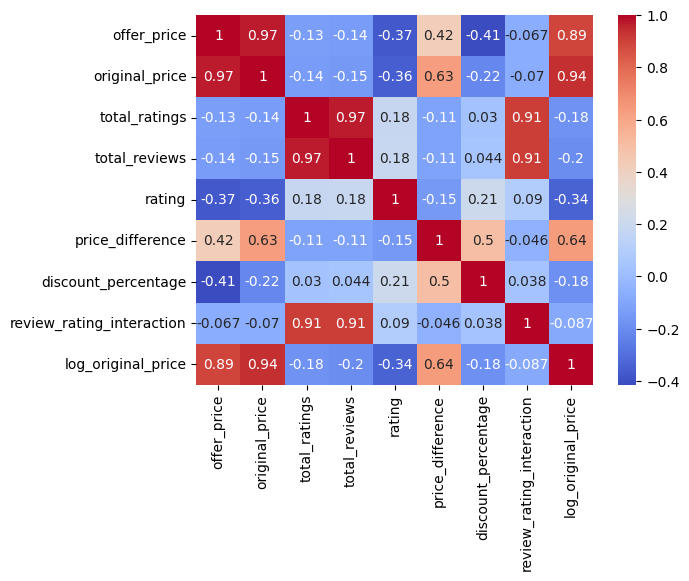

In [188]:
print(df.head())
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


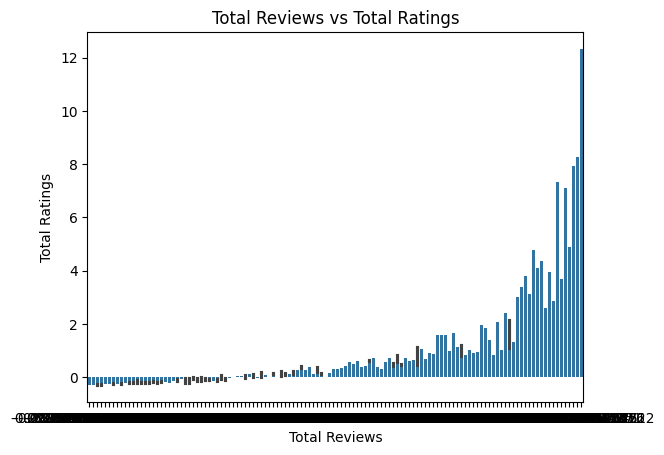

In [189]:
sns.barplot(x=df['total_reviews'], y=df['total_ratings'])
plt.title('Total Reviews vs Total Ratings')
plt.xlabel('Total Reviews')
plt.ylabel('Total Ratings')
plt.show()

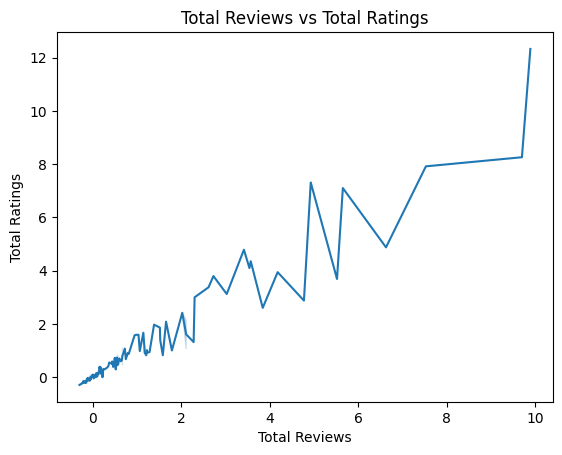

In [190]:
sns.lineplot(x=df['total_reviews'], y=df['total_ratings'])
plt.title('Total Reviews vs Total Ratings')
plt.xlabel('Total Reviews')
plt.ylabel('Total Ratings')
plt.show()

In [191]:
#Measures of Central Tendency and Dispersion:
Mean=df['total_reviews'].mean()
print(Mean)
Median=df['total_reviews'].median()
print(Median)
Mode=df['total_reviews'].mode()
print(Mode)
StadardDeviation=df['total_reviews'].std()
print(StadardDeviation)
Variance=df['total_reviews'].var()
print(Variance)


-1.8978171361113787e-17
-0.2695881685842135
0   -0.298924
Name: total_reviews, dtype: float64
1.0005346164509206
1.0010695187165908


In [192]:
#Frequency Tables and Cross-Tabulations:
FrequencyTable=df['total_reviews'].value_counts()
print(FrequencyTable)
CrossTab=pd.crosstab(df['total_reviews'], df['total_ratings'])
print(CrossTab)
#value count
df['total_reviews'].value_counts()
#crosstab
pd.crosstab(df['total_reviews'], df['total_ratings'])

total_reviews
-0.298924    305
-0.174246    117
-0.276922     68
-0.291590     49
-0.152244     43
            ... 
 2.282653      1
 3.844801      1
 0.148451      1
-0.034899      1
 0.500485      1
Name: count, Length: 124, dtype: int64
total_ratings  -0.290227   -0.289246   -0.288264   -0.287283   -0.286301   \
total_reviews                                                               
-0.298924             246           0           0          17          13   
-0.291590               0           2           6           4           3   
-0.284256               0           0           0           0           1   
-0.276922               0           0           0           0           0   
-0.269588               0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
 5.656305               0           0           0           0           0   
 6.631731               0           0           0           0      

total_ratings,-0.290227,-0.289246,-0.288264,-0.287283,-0.286301,-0.285320,-0.284338,-0.283356,-0.282375,-0.281393,...,3.943291,4.096416,4.354570,4.785479,4.874802,7.100025,7.311063,7.915711,8.257298,12.322968
total_reviews,,,,,,,,,,,,,,,,,,,,,
-0.298924,246,0,0,17,13,6,4,1,3,2,...,0,0,0,0,0,0,0,0,0,0
-0.291590,0,2,6,4,3,4,2,6,1,1,...,0,0,0,0,0,0,0,0,0,0
-0.284256,0,0,0,0,1,2,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
-0.276922,0,0,0,0,0,2,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
-0.269588,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5.656305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6.631731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
7.533816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [193]:
import plotly.express as px
fig=px.bar(df, x='total_reviews', y='total_ratings')
fig.show()



In [194]:
# Identifying and handling outliers (example using IQR)
Q1 = df['original_price'].quantile(0.25)
Q3 = df['original_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['original_price'] >= lower_bound) & (df['original_price'] <= upper_bound)]

# Alternatively, you can replace outliers with the median or mean:
df['original_price'] = np.where(df['original_price'] > upper_bound, df['original_price'].median(), df['original_price'])
df['original_price'] = np.where(df['original_price'] < lower_bound, df['original_price'].median(), df['original_price'])
print(df['original_price'])

0      0.119430
1     -0.402420
2     -0.126120
3     -0.727797
4     -0.364498
         ...   
931   -0.483727
932   -0.711373
933   -0.550383
934   -0.171652
935   -0.402420
Name: original_price, Length: 936, dtype: float64


In [195]:
# Feature Selection using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

estimator = LinearRegression() # Or any other model
selector = RFE(estimator, n_features_to_select=3, step=1) # Select top 3 features
selector = selector.fit(X, y)
selected_features = X.columns[selector.support_]

# Feature Engineering - Creating interaction terms
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True) # Create interaction terms
X_poly = poly.fit_transform(X)
print(X_poly)

[[ 1.          0.11942963 -0.2769222  ... -0.03307271 -0.03290333
   0.07629314]
 [ 1.         -0.40241951 -0.17424582 ...  0.07011992  0.07136778
   0.03090192]
 [ 1.         -0.12611965  0.2144576  ... -0.02704732 -0.01799042
   0.03059144]
 ...
 [ 1.         -0.55038328 -0.29892428 ...  0.16452292  0.15973634
   0.08675603]
 [ 1.         -0.17165197 -0.29892428 ...  0.05131094  0.04981811
   0.08675603]
 [ 1.         -0.40241951 -0.15224374 ...  0.06126585  0.08874793
   0.0335752 ]]


In [196]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = ['offer_price', 'original_price', 'total_reviews', 'total_ratings']
# Assuming these are your numerical columns

# Fit and transform the scaler on only the numerical features
scaled_data = scaler.fit_transform(df[numerical_features])

# Now, 'scaled_data' contains only the scaled numerical features
principal_components = pca.fit_transform(scaled_data)
print(principal_components)

[[-0.56191171  0.36220428]
 [-0.05170351 -0.55954463]
 [ 0.21387135  0.14090071]
 ...
 [-0.13063487 -0.81845682]
 [-0.38529786 -0.16378383]
 [-0.06556892 -0.56543208]]


In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [198]:
X = df[['original_price', 'total_reviews', 'total_ratings']]  # Choose relevant features
y = df['offer_price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(model.coef_)
print(model.intercept_)



Mean Squared Error: 2555034817.8134365
R-squared: 0.1218235773996782
[38690.4531496  -9674.04704117  4846.88405573]
80987.56114933909


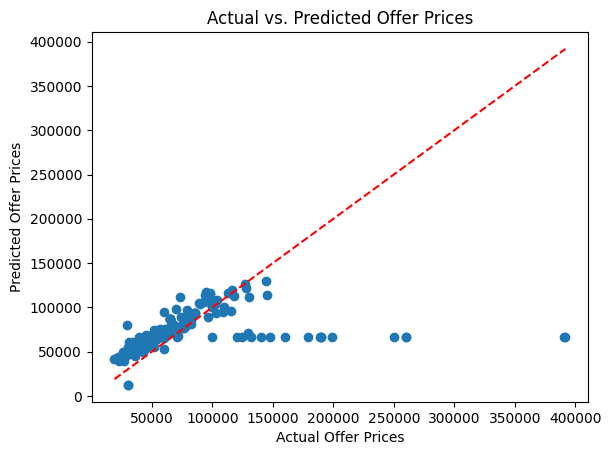

In [199]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Offer Prices")
plt.ylabel("Predicted Offer Prices")
plt.title("Actual vs. Predicted Offer Prices")
# Add a diagonal line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

Mean Squared Error: 835829313.7497056
R-squared: 0.1218235773996782
Decision Tree Regression Model:
[0.71323543 0.02575362 0.26101095]


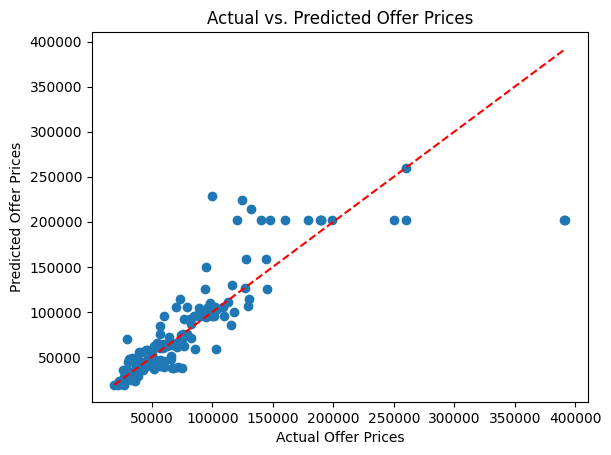

In [200]:
#Decision Tree Regression:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X = df[['original_price', 'total_reviews', 'total_ratings']]  # Choose relevant features
y = df['offer_price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Decision Tree Regression Model:")
print(model.feature_importances_)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Offer Prices")
plt.ylabel("Predicted Offer Prices")
plt.title("Actual vs. Predicted Offer Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


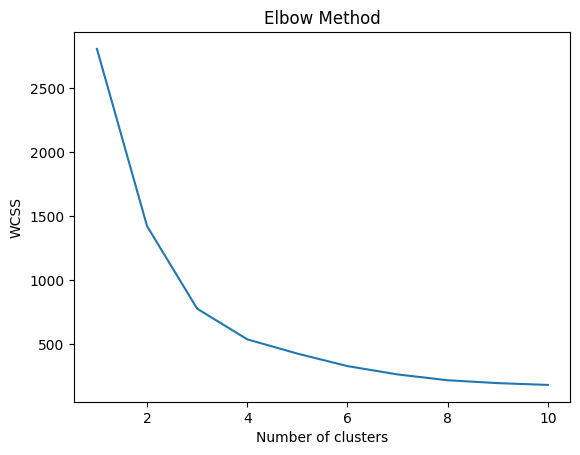

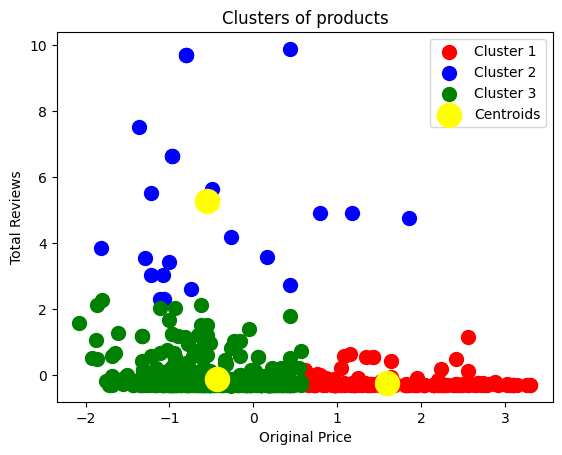

In [201]:
#K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# 1. Select features for clustering
X = df[['original_price', 'total_reviews', 'total_ratings']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of products')
plt.xlabel('Original Price')
plt.ylabel('Total Reviews')
plt.legend()
plt.show()




In [202]:
# Silhouette Score for cluster evaluation
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3) # Example with 3 clusters
kmeans.fit(X_scaled)
labels = kmeans.labels_
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Experiment with different cluster numbers and compare silhouette scores
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")


Silhouette Score: 0.6138311502063314
Silhouette Score for 2 clusters: 0.8378707639750191
Silhouette Score for 3 clusters: 0.6088987389173073
Silhouette Score for 4 clusters: 0.631855226829715
Silhouette Score for 5 clusters: 0.5325592861689477


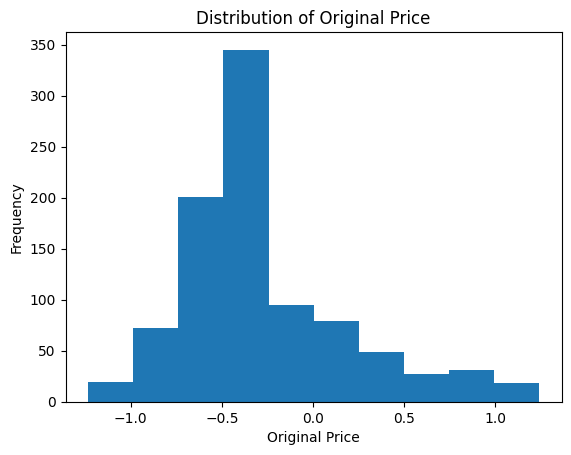

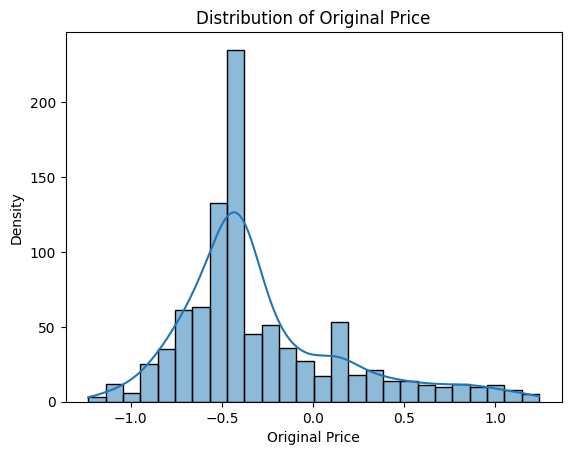

In [203]:
# Using matplotlib.pyplot
plt.hist(df['original_price'], bins=10)
plt.xlabel('Original Price')
plt.ylabel('Frequency')
plt.title('Distribution of Original Price')
plt.show()

# Using seaborn
sns.histplot(df['original_price'], kde=True)  # kde adds a kernel density estimate
plt.xlabel('Original Price')
plt.ylabel('Density')
plt.title('Distribution of Original Price')
plt.show()